# Homework 6: Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Solution

***

This assignment is due on Moodle by **5pm on Friday December 1st**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [15 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 
***

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Stevey McKnowsNoStats. At various points in your day you catch Stevey making the following mistakes.  In each case, clearly explain to Stevey why his testing setup or conclusion is incorrect. 

**Part A**: Stevey has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Stevey wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \bar{x} = 30$. 

**Solution**: The null hypothesis should include the population mean, e.g. $H_0: \mu = 30$. A hypothesis test about the sample mean (1) is very easy to do (just look at the sample mean) and (2) tells you nothing about the population.  

**Part B**: After the wonderful explanation you gave him after the previous debacle, Stevey has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \mu < 30$.  

**Solution**: The null hypothesis should have an equals sign and not an inequality.  The reason for this is that the null hypothesis defines the distribution that we will compare our data against.  A claim like $\mu < 30$ does not specify a particular value of $\mu$ that we can define our distribution by. 

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a normalized test-statistic of $z = -1.35$ for the mean age and concludes that since $z = -1.35 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

**Solution**: Stevey is incorrectly comparing the test-statistic $z$ to the significance level $\alpha$, which makes no sense.  Instead he should compare the test-statistic to the relevant critical value $z_\alpha$.  Alternatively, he could compute a $p$-value associated with the test statistic and compare this value to the significance level. 

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

**Solution**: The p-value is not a probability that the null hypothesis is true or false.  The p-value represents the probability, under the null hypothesis, that we observe a test-statistic as extreme or more extreme than the one we got from the data. 

### [10 points] Problem 2 - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). In what ways are scientists misusing p-values?  What suggestions are being made to use them properly? 

**Solution**: According to the article, scientists are misusing p-values by: 

1. Assuming that p-values tell you the probability that the alternative hypothesis is true 
2. Assuming that the p-values tell you the probability of observing the data by random chance (with no consideration for the null hypothesis). 
3. P-Hacking 
4. Setting arbitrary thresholds for significance and ignoring scientific reasoning. 

The suggestions being made to use them properly include: 

1. Use confidence intervals and Bayesian measures instead. 
2. Use p-values as a tool in conjunction with other techniques. 

### [20 points] Problem 3 - Evaluating Pizza Delivery Performance 
***

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in pizza.csv. 

In [8]:
np.random.seed(1235)
dfP = pd.read_csv("data/pizza.csv")

# Modify mean delivery time to be 29.75 and stdev to be 6ish  
# dfP.loc[:,"time"] -= (dfP.loc[:,"time"]-29.5723424)
# dfP.loc[:,"time"] += stats.norm.rvs(0,6,size=len(dfP))
# print(dfP["time"].mean())
# print(dfP["time"].std())

# Modify mean delivery temperature to be 64.25
# dfP.loc[:,"temperature"] -= (dfP.loc[:,"temperature"]-65.0524242)
# dfP.loc[:,"temperature"] += stats.norm.rvs(0,7,size=len(dfP))
# print(dfP["temperature"].mean())
# print(dfP["temperature"].std())

# dfP = dfP.iloc[:,:9]

# dfP.to_csv("new_pizza.csv", index=False)

In [9]:
dfP.head(20)

,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,01-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,01-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,2
2,Thursday,01-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,01-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,01-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2
5,Thursday,01-May-14,21.727466,Melissa,Centre,Bruno,53.715391,61.8,4
6,Thursday,01-May-14,38.394169,Laura,West,Bruno,60.266862,57.9,3
7,Thursday,01-May-14,22.186179,Melissa,West,Mario,61.187654,35.8,2
8,Thursday,01-May-14,35.324994,Laura,Centre,Mario,64.204093,36.6,2
9,Thursday,01-May-14,34.015280,Melissa,Centre,Bruno,67.383452,44.8,5


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

**Solution**: Let $\mu$ be the mean delivery time. We want to test the hypotheses 

$$
H_0: \mu = 30 
\\ 
H_1: \mu < 30 
$$

Since $n = 1266$, the sample size is large enough that we can perform a lower-tailed $Z$-test.  Let $\bar{x}$ be the sample mean and $s$ be the sample standard deviation for delivery time.  Then our test statistic is 

$$
Z = \frac{\bar{x}-30}{s/\sqrt{n}} \sim N(0,1) 
$$

We can perform the test either using rejection regions or p-values.  The equivalent tests are 

**Rejection Region**: Reject the Null Hypothesis if $Z < -z_{0.05} = -1.645$, else fail to reject the Null Hypothesis

**P-Value Test**: Reject the Null Hypothesis if $\textrm{p-value} = \Phi(Z) < 0.05$, else fail to reject the Null 

In [12]:
n = len(dfP["time"])
xbar = dfP["time"].mean()
s = dfP["time"].std()
print("n = {}, xbar = {:.3f}, s = {:.3f}".format(n, xbar, s))
Z = (xbar - 30)/(s/np.sqrt(n))
print("test statistic: Z = {:.5f}".format(Z))
print("p-value = {}".format(stats.norm.cdf(Z)))

n = 1266, xbar = 29.455, s = 6.112
test statistic: Z = -3.17121
p-value = 0.0007590326718124498


**Rejection Region**: Since $-3.171 = Z < -z_{0.05} = -1.645$ we reject the Null Hypothesis and conclude that there is sufficient statistical evidence to conclude that true mean delivery time is less than 30 minutes. 

**P-Value Test**: Since $\Phi(Z) = 0.00076 < .05$ we reject the Null Hypothesis and conclude that there is sufficient statistical evidence to conclude that true mean delivery time is less than 30 minutes. 

**Part B**: The manager also has the goal of having an average delivery temperature across all branches of greater than 65F.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

**Solution**: Let $\mu$ be the mean temperature. We want to test the hypotheses 

$$
H_0: \mu = 65 
\\ 
H_1: \mu > 65 
$$

Since $n = 1266$, the sample size is large enough that we can perform an upper-tailed $Z$-test.  Let $\bar{x}$ be the sample mean and $s$ be the sample standard deviation for delivery temperature.  Then our test statistic is 

$$
Z = \frac{\bar{x}-65}{s/\sqrt{n}} \sim N(0,1) 
$$

We can perform the test either using rejection regions or p-values.  The equivalent tests are 

**Rejection Region**: Reject the Null Hypothesis if $Z > z_{0.05} = 1.645$, else fail to reject the Null Hypothesis

**P-Value Test**: Reject the Null Hypothesis if $\textrm{p-value} = 1-\Phi(Z) < 0.05$, else fail to reject the Null 

In [34]:
xbar = dfP["temperature"].mean()
s = dfP["temperature"].std()
print("n = {}, xbar = {:.3f}, s = {:.3f}".format(n, xbar, s))
Z = (xbar - 65)/(s/np.sqrt(n))
print("test statistic: Z = {:.3f}".format(Z))
print("p-value = {}".format(1-stats.norm.cdf(Z)))

n = 1266, xbar = 65.274, s = 7.067
test statistic: Z = 1.382
p-value = 0.08347224174346857


**Rejection Region**: Since $1.382 = Z < z_{0.05} = 1.645$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence to conclude that true mean delivery temperature is greater than 65F. 

**P-Value Test**: Since $1-\Phi(Z) = 0.0835 > .05$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence to conclude that true mean delivery temperature is greater than 65F. 

**Part C**: The manager has enough money to give one of his delivery drivers a raise based on good performance. He knows from the data that his two best drivers are Mario and Luigi, but he's not sure if there is evidence that either one is better than the other.  Using delivery time and temperature as the criteria, perform any necessary hypothesis tests at the $\alpha = 0.05$ significance level, to determine if one of the drivers deserves a raise. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

**Solution**: We'll evaluate separate statistical tests to compare Mario and Luigi in terms of mean delivery time and mean delivery temperature. 

**Delivery Time**: 

Let $\mu_M$ and $\mu_L$ be the true mean delivery times for Mario and Luigi, respectively. We want to test the hypotheses 

$$
H_0: \mu_M - \mu_L = 0 
\\ 
H_1: \mu_M - \mu_L \neq 0 
$$

We perform a two-tailed test for the difference of two means.  Let $\bar{x}_M$ and $\bar{x}_L$ be the sample means and $s_M$ and $s_L$ be the sample standard deviations for Mario and Luigi, respectively.  Then our test statistic is 

$$
Z = \left(\bar{x}_M-\bar{x}_L\right)\bigg/\sqrt{\frac{s_M^2}{n_M} + \frac{s_L^2}{n_L}} \sim N(0,1) 
$$

We can perform the test either using using a confidence interval, rejection regions, or p-values.  The equivalent tests are 

**Confidence Interval**: Reject the Null Hypothesis if $0$ is in the confidence interval $\left(\bar{x}_M-\bar{x}_L\right) \pm z_{0.025} \times \sqrt{\frac{s_M^2}{n_M} + \frac{s_L^2}{n_L}}$, else fail to reject the Null Hypothesis. 

**Rejection Region**: Reject the Null Hypothesis if $Z < -z_{0.025} = -1.96$ or $Z > z_{0.025} = 1.96$, else fail to reject the Null Hypothesis

**P-Value Test**: Reject the Null Hypothesis if $\textrm{p-value} = 2 \times \min\{\Phi(Z), 1-\Phi(Z)\} < 0.05$, else fail to reject the Null 

In [45]:
n_M, n_L = np.sum(dfP["driver"]=="Mario"), np.sum(dfP["driver"]=="Luigi")
xbar_M, xbar_L = dfP.loc[dfP["driver"]=="Mario","time"].mean(), dfP.loc[dfP["driver"]=="Luigi","time"].mean()
s_M, s_L = dfP.loc[dfP["driver"]=="Mario","time"].std(), dfP.loc[dfP["driver"]=="Luigi","time"].std()
SE = np.sqrt((s_M**2)/n_M + (s_L**2)/n_L)
CI = [(xbar_M - xbar_L) + flip * stats.norm.ppf(0.975) * SE for flip in [-1,1]]
print("CI: ", CI)
Z = (xbar_M - xbar_L)/SE 
print("test statistic: Z = {:.5f}".format(Z))
print("p-value = {}".format(2*np.min([stats.norm.cdf(Z), 1-stats.norm.cdf(Z)])))

CI:  [-1.1587720960852119, 1.1639463841639037]
test statistic: Z = 0.00437
p-value = 0.9965162995732613


**Confidence Interval**: Since $0 \in [-1.159, 1.164]$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence that there is a difference between the true mean delivery times for the two drivers. 

**Rejection Region**: Since $-1.96 < Z =0.0044 < 1.96$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence that there is a difference between the true mean delivery times for the two drivers. 

**P-Value Test**: Since $2\times\Phi(Z) = 0.9965 > .05$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence that there is a difference between the true mean delivery times for the two drivers. 

**Delivery Temperature**: 

Let $\mu_M$ and $\mu_L$ be the true mean delivery temperatures for Mario and Luigi, respectively. We want to test the hypotheses 

$$
H_0: \mu_M - \mu_L = 0 
\\ 
H_1: \mu_M - \mu_L \neq 0 
$$

We perform a two-tailed test for the difference of two means.  Let $\bar{x}_M$ and $\bar{x}_L$ be the sample means and $s_M$ and $s_L$ be the sample standard deviations for Mario and Luigi, respectively.  Then our test statistic is 

$$
Z = \left(\bar{x}_M-\bar{x}_L\right)\bigg/\sqrt{\frac{s_M^2}{n_M} + \frac{s_L^2}{n_L}} \sim N(0,1) 
$$

We can perform the test either using using a confidence interval, rejection regions, or p-values.  The equivalent tests are 

**Confidence Interval**: Reject the Null Hypothesis if $0$ is in the confidence interval $\left(\bar{x}_M-\bar{x}_L\right) \pm z_{0.025} \times \sqrt{\frac{s_M^2}{n_M} + \frac{s_L^2}{n_L}}$, else fail to reject the Null Hypothesis. 

**Rejection Region**: Reject the Null Hypothesis if $Z < -z_{0.025} = -1.96$ or $Z > z_{0.025} = 1.96$, else fail to reject the Null Hypothesis

**P-Value Test**: Reject the Null Hypothesis if $\textrm{p-value} = 2 \times \min\{\Phi(Z), 1-\Phi(Z)\} < 0.05$, else fail to reject the Null 

In [46]:
n_M, n_L = np.sum(dfP["driver"]=="Mario"), np.sum(dfP["driver"]=="Luigi")
xbar_M, xbar_L = dfP.loc[dfP["driver"]=="Mario","temperature"].mean(), dfP.loc[dfP["driver"]=="Luigi","temperature"].mean()
s_M, s_L = dfP.loc[dfP["driver"]=="Mario","temperature"].std(), dfP.loc[dfP["driver"]=="Luigi","temperature"].std()
SE = np.sqrt((s_M**2)/n_M + (s_L**2)/n_L)
CI = [(xbar_M - xbar_L) + flip * stats.norm.ppf(0.975) * SE for flip in [-1,1]]
print("CI: ", CI)
Z = (xbar_M - xbar_L)/SE 
print("test statistic: Z = {:.5f}".format(Z))
print("p-value = {}".format(2*np.min([stats.norm.cdf(Z), 1-stats.norm.cdf(Z)])))

CI:  [-2.0724233272399402, 0.71302052203945143]
test statistic: Z = -0.95654
p-value = 0.3388009215252752


**Confidence Interval**: Since $0 \in [-2.072, 0.713]$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence that there is a difference between the true mean delivery temperatures for the two drivers. 

**Rejection Region**: Since $-1.96 < Z = -0.957 < 1.96$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence that there is a difference between the true mean delivery temperatures for the two drivers. 

**P-Value Test**: Since $2\times(1-\Phi(Z)) = 0.3389 > .05$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence that there is a difference between the true mean delivery temperatures for the two drivers. 

Thus, based on the data, the manager cannot give either driver a raise based on their delivery times or delivery temperatures. 

**Part D**: On the other hand, the manager suspects that Salvatore has been underperforming as a driver.  The manager has a policy that if a pizza takes 40 minutes or longer to be delivered, he has to fork over a free bottle of wine.  This policy is only financially viable for the pizza chain if they have give out free wine on less than 5% of all pizza deliveries.  Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if there is significant evidence that the proportion of Salvatore's deliveries that take longer than 40 minutes is greater than 5%.  

**Solution**: Let $p$ be the true proportion of Salvatore's deliveries that take longer than 40 minutes. We want to test the hypotheses 

$$
H_0: p = 0.05 
\\ 
H_1: p > 0.05 
$$

We will perform an upper-tailed $Z$-test.  Let $\hat{p}$ be the sample proportion. Then our test statistic is 

$$
Z = (~\hat{p}-0.05~) \bigg/ \sqrt{\frac{0.05(1-0.05)}{n}} \sim N(0,1) 
$$

We can perform the test either using rejection regions or p-values.  The equivalent tests are 

**Rejection Region**: Reject the Null Hypothesis if $Z > z_{0.05} = 1.645$, else fail to reject the Null Hypothesis

**P-Value Test**: Reject the Null Hypothesis if $\textrm{p-value} = 1-\Phi(Z) < 0.05$, else fail to reject the Null 

In [5]:
n_S = np.sum(dfP["driver"]=="Salvatore")
phat = np.sum(np.logical_and(dfP["driver"]=="Salvatore", dfP["time"]>40)) / n_S 
print("n = {}, phat = {:.4f}".format(n_S, phat))
SE = np.sqrt(0.05*(1-0.05)/n_S)
Z = (phat-0.05)/SE 
print("test statistic: Z = {:.4f}".format(Z))
print("p-value = {:.4f}".format(1-stats.norm.cdf(Z)))

n = 344, phat = 0.0552
test statistic: Z = 0.4453
p-value = 0.3281


**Rejection Region**: Since $0.4453 = Z < z_{0.05} = 1.645$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence that the true proportion of deliveries for which Salvatore is late is greater than $p=0.05$. 

**P-Value Test**: Since $1-\Phi(Z) = 0.3281 > .05$ we fail to reject the Null Hypothesis and conclude that there is **NOT** sufficient statistical evidence that the true proportion of deliveries for which Salvatore is late is greater than $p=0.05$. 

### [15 points] Problem 4 - Naps vs Coffee for Memory? 
***

The consumption of coffee to benefit alertness is a common activity practiced by 90% of adults in North America. Often coffee is used to replace the need for sleep. One recent study compares students’ ability to recall memorized information after either the consumption of coffee or a brief nap. A random sample of 24 adults
were randomly divided into two groups and verbally given a list
of 25 words to memorize. During a break, one of the groups took a nap for an hour and a half,
another group stayed awake and were given a coffee an hour prior to testing. Researchers measured the number of words participants were
able to recall following the break. The summary statistics for the two groups are shown below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Nap} & 12 & 15.5 & 3.2 \\ 
\textrm{Coffee} & 12 & 12.25 & 3.1 \\ 
\end{array}
$$

In previous experiments the mean recall measurement was found to be normally distributed. 

**Part A**: Compute a 95% t-confidence interval for the mean recall measurement for participants that took a nap before the test. Do all computations in Python. 

**Solution**: We compute the confidence interval as 

$$
\bar{x} \pm t_{\alpha/2, n-1} \times \dfrac{s}{\sqrt{n}}
$$

In [298]:
xbar, s, n = 15.5, 3.2, 12   
CI = [xbar + flip * stats.t.ppf(0.975, n-1) * s/np.sqrt(n) for flip in [-1,1]]
print(CI)

[13.46681700054998, 17.53318299945002]


**Part B**: Is there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes better memory recall that drinking coffee?  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python. 

**Solution**: We will perform a hypothesis test for the difference between the means.  Since the sample sizes are small, we will use a t-test.  Our hypotheses are 

$$
\begin{array}{ll}
H_0 & \mu_N - \mu_C =0 \\
H_1 & \mu_N - \mu_C > 0 \\
\end{array}
$$

The test statistic is given by $T = (\bar{x}_N - \bar{x}_C)\bigg/\sqrt{\frac{s_N^2}{n_N} + \frac{s_C^2}{n_C}}$ which follows the t-distribution with $n_N + n_C - 2$ degrees of freedom. Our two tests are 

**Rejection Region**: $T > t_{0.025, 22} = 2.074$   

**P-Value Test**: $p$-value $=1 - $stats.t.cdf($T, 22) < \alpha$ 

In [65]:
xbar, sx, nx = 15.5, 3.2, 12   
ybar, sy, ny = 12.25, 3.1, 12   
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 
pval = 1-stats.t.cdf(T, nx + ny -2)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

T = 2.527
pval = 0.010


**Rejection Region**: Since $T = 2.527 > 2.074$ we reject the null and conclude that taking a nap promotes better memory recall than coffee. 

**P-Value Test**: Since $p$-value $0.01 < 0.05$ we reject the null and conclude that taking a nap promotes better memory recall than coffee. 

**Part C**: Compute a 95% confidence interval for the standard deviation of memory recall for coffee drinkers. Do all computations in Python.  

**Solution**: Our confidence interval for the standard deviation is given by 

$$
\sqrt{\dfrac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}}} \leq \sigma \leq 
\sqrt{\dfrac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}}} 
$$

We have 

In [303]:
alpha = 0.05 
c2, c1 = stats.chi2.ppf(alpha/2, n-1), stats.chi2.ppf(1-alpha/2, n-1)
CI = [np.sqrt((n-1)*sy*sy/c1), np.sqrt((n-1)*sy*sy/c2)]
print(CI)

[2.1960249676730244, 5.2634218549444185]


### [20 points] Problem 5 - Bad Science for Fun and Profit 
***

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month. 

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in email.csv. Load this dataset into Pandas. 

In [19]:
dfAd = pd.read_csv("data/email.csv")
dfAd.head()

,Group,Date,Sent,Clicked
0,1,NaN,50,1
1,1,Oct 2 2017,50,2
2,1,Oct 3 2017,50,4
3,1,NaN,50,5
4,1,Oct 5 2017,50,1


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

**Solution**: 

$H_0: p = 0.05$ (the CTR of Johnny's ad is equal to the usual $0.05$)

$H_1: p > 0.05$ (the CTR of Johnny's ad is greater than the standard $0.05$) 


**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

In [20]:
def ztest(clicks, sent, alpha=0.05):
    '''
    Function to test H1: p > 0.05 
    Returns p-value based on H0: p=0.05 
    '''
    n = np.sum(sent)
    phat = np.sum(clicks)/n
    SE = np.sqrt(0.05*(1-0.05)/n)
    z = (phat-0.05)/SE 
    pvalue = 1 - stats.norm.cdf(z)
    return pvalue 

# Test H1 on all data
print("All Data: p-value = {:.4f}".format(ztest(dfAd["Clicked"], dfAd["Sent"], alpha=0.05)))

All Data: p-value = 0.2244


**Part C**: Bummer, Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups or days) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [21]:
# Test H1 on all groups 
for g in range(1,4+1):
    print("Group {}: p-value = {:.4f}".format(g, ztest(dfAd.loc[dfAd["Group"]==g, "Clicked"], dfAd.loc[dfAd["Group"]==g, "Sent"], alpha=0.05)))

Group 1: p-value = 0.7392
Group 2: p-value = 0.3417
Group 3: p-value = 0.2608
Group 4: p-value = 0.1341


In [22]:
# Test on Data without missing Dates 
print("No Date All: p-value = {:.4f}".format(ztest(dfAd.loc[dfAd["Date"] != "NA", "Clicked"], dfAd.loc[dfAd["Date"] != "NA", "Sent"], alpha=0.05)))

No Date All: p-value = 0.2244


In [39]:
# Test on Group Data without missing Dates 
dfClean = dfAd.loc[dfAd["Date"].notnull(), :].copy()
# Test H1 on all groups 
for g in range(1,4+1):
    print("No Date Group {}: p-value = {:.4f}".format(g, ztest(dfClean.loc[dfClean["Group"]==g, "Clicked"], dfClean.loc[dfClean["Group"]==g, "Sent"], alpha=0.05)))

No Date Group 1: p-value = 0.8334
No Date Group 2: p-value = 0.5000
No Date Group 3: p-value = 0.0076
No Date Group 4: p-value = 0.4666


**Eureka!**.  Johnny's hypothesis is true if he only looks at the data from Group 3 when he excludes rows with missing dates! 

In [294]:
np.random.seed(1236)
truep = 0.05
df = pd.DataFrame({"Group": np.zeros(31*4, dtype=int), 
                   "Date": np.zeros(31*4, dtype=str), 
                   "Sent": np.zeros(31*4, dtype=int), 
                   "Clicked": np.zeros(31*4, dtype=int)})
for g in range(4):
    # Set group number 
    df.loc[g*31:(g+1)*31, "Group"] = g+1
    # Set date 
    for day in range(31):
        df.loc[g*31+day, "Date"] = "Oct {:2d} 2017".format(day+1)
    # Set number of emails sent 
    df.loc[g*31:(g+1)*31, "Sent"] = 50 
    
# Set clicked to random draw from Bin(50, 0.05)
df.loc[:,"Clicked"] = np.random.binomial(50, truep, size=31*4)
    
# Remove a third of the dates in Group 3 
for ind in range(len(df)):
    if np.random.choice([1,2]) == 1:
        df.loc[ind, "Date"] = "NA"
    else:
        if df.loc[ind, "Group"] == 3:
            df.loc[ind, "Clicked"] = np.random.binomial(50, 0.070)
            
df=df.loc[:,["Group", "Date", "Sent", "Clicked"]]
    
# df.to_csv("email.csv", index=False)

### [20 points] Problem 6 - Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. In this exercise you will construct a simple linear regression model for the response variable mpg with horsepower as the feature. Load the data into a Pandas DataFrame.    


In [42]:
dfAuto = pd.read_csv("data/auto.csv")
dfAuto.head()

,model,year,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,70,18.0,8,130.0,3504.0
1,buick skylark 320,70,15.0,8,165.0,3693.0
2,plymouth satellite,70,18.0,8,150.0,3436.0
3,amc rebel sst,70,16.0,8,150.0,3433.0
4,ford torino,70,17.0,8,140.0,3449.0


**Part A**: Perform a simple linear regression with horsepower as the feature and mpg as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [59]:
beta, alpha, rvalue, pvalue, stderr = stats.linregress(dfAuto["horsepower"], dfAuto["mpg"])
print("Y = {:.3f} + {:.3f}X".format(alpha, beta))

Y = 39.936 + -0.158X


**Part B**: Make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 


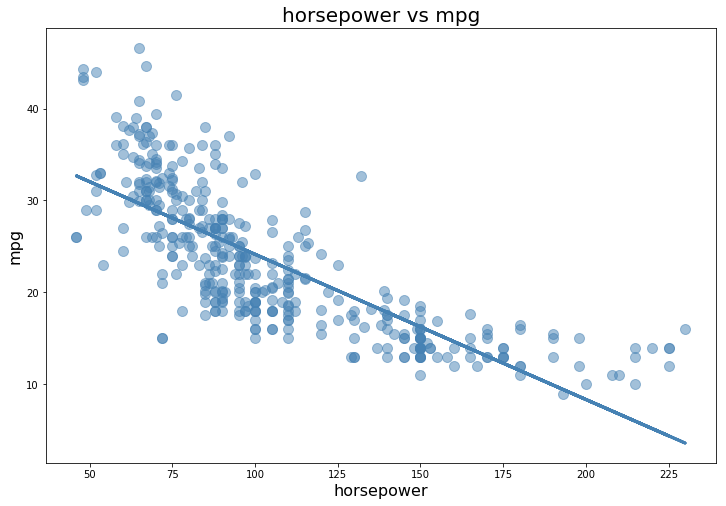

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.scatter(dfAuto["horsepower"], dfAuto["mpg"], color="steelblue", alpha=0.5, s=100)
ax.set_xlabel("horsepower", fontsize=16)
ax.set_ylabel("mpg", fontsize=16)
ax.set_title("horsepower vs mpg", fontsize=20)
ax.plot(dfAuto["horsepower"], alpha + beta * dfAuto["horsepower"], color="steelblue", lw=3);

**Part C**: Is the relationship between horsepower and mpg positive or negative? Justify your response. 

**Solution**: The relationship is negative.  We can see this because $\hat{\beta} = -0.158$ and because the slope of the fitted regression line in the graph is clearly negative.  

**Part D**: Find a 95% confidence interval for the slope parameter.  Based on this confidence interval, is there sufficient evidence to believe, at the 95% confidence level, that there is a real relationship between horsepower and mpg? 

In [63]:
CI = [beta + flip * stats.t.ppf(0.975, len(dfAuto)-2) * stderr for flip in [-1,1]]
print("CI: [{:.3f}, {:.3f}]".format(CI[0], CI[1]))

CI: [-0.171, -0.145]


**Solution**: Since the confidence interval does not include $0$ we conclude, at the 95% confidence interval, that there is sufficient evidence to suggest that the relationship between horsepower and mpg is real. 

**Part E**: Double-check your result from **Part D** by performing an equivalent hypothesis test.  Be sure to state your null and alternative hypotheses and explain your general methodology.  Do your conclusions agree with those made in **Part D**? 

**Solution**: Our hypotheses are 

$$
\begin{array}{ll}
H_0: & \beta = 0 \\
H_1: & \beta \neq 0 \\
\end{array}
$$

Our test statistic is $T = \dfrac{\hat{\beta} - 0}{SE}$ where $SE$ is the standard error for the slope reported by stats.linregress. 

This test statistic follows the $t$-distribution with $n-2$ degrees of freedom.  We can either do a Rejection Region test or a p-value test.  

**Rejection Region**: Test $T < t_{0.975, 390} = -1.97$ or $T > t_{0.025, 390} = 1.97$ 

**P-Value Test**: $p$-value $= 2 \times \min( 1-$stats.t.cdf(T, 390),  stats.t.cdf(T,390)$ )$

In [62]:
T = (beta - 0)/stderr
pval = 2*np.min([stats.t.cdf(T, len(dfAuto)-2), 1-stats.t.cdf(T, len(dfAuto)-2)])
print("t-statistic = {:.3f}, p-value = {}".format(T, pval))

t-statistic = -24.489, p-value = 7.031989029404864e-81


Since $T = -24.489 < -1.97$ we conclude from the Rejection Region test that the slope parameter is nonzero.

Since $p$-value $= 7.03 \times 10^{-81} < 0.05$ we conclude that the slope parameter is nonzero. 

**Part F**: What gas mileage would your simple linear regression model predict for a car with a horsepower of $97$? 

In [285]:
y = alpha + beta * 97
print("y(97) = {:.3f} mpg".format(y))

y(97) = 24.625 mpg
